In [1]:
from qwak.qwak import QWAK
from utils.plotTools import plot_qwak

import networkx as nx
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from math import sqrt, ceil, pow
import scipy.special as sp
import sympy as simp
import math
import copy
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import json

from scipy.ndimage import gaussian_filter

In [2]:
def load_pst(filename):
    # Check if the file exists
    if os.path.exists(filename):
        # If the file exists, load the data from the file
        with open(filename, 'r') as file:
            pst_data = json.load(file)
        print(f'{filename} exists!')
    else:
        # If the file does not exist, generate the data
        print(f'{filename} doesnt exist!')
        pst_data = []
    # Return the data
    return pst_data

def pst_found_only(input_dict):
    # Create a new dictionary by filtering out key-value pairs where the value is equal to '-1'
    # Note: assuming the values in the dictionary are stored as strings, as in the previous examples
    filtered_dict = {key: value for key, value in input_dict.items() if value != '-1'}
    if not filtered_dict:
        return ['PST not found for this structure!']
    
    # Return the filtered dictionary
    return filtered_dict

In [3]:
pst_file_p3 = f'Datasets/PerfectStateTransfer/pstSimple_Path_N3.txt'
pst_file_c4 = f'Datasets/PerfectStateTransfer/pstSimple_Cycle_N4.txt'
pst_file_c6 = f'Datasets/PerfectStateTransfer/pstSimple_Cycle_N6.txt'
pst_file_h8 = f'Datasets/PerfectStateTransfer/pstSimple_Hypercube_N8.txt'
pst_file_h16 = f'Datasets/PerfectStateTransfer/pstSimple_Hypercube_N16.txt'

pst_file_p2p2 = f'Datasets/PerfectStateTransfer/pstCartesian_Path_N4.txt'
pst_filec_c2c4 = f'Datasets/PerfectStateTransfer/pstCartesian_Cycle_N8.txt'
pst_file_c4c4 = f'Datasets/PerfectStateTransfer/pstCartesian_Cycle_N16.txt'
pst_file_c4p2 = f'Datasets/PerfectStateTransfer/pstCartesian_CyclePath_N8.txt'

In [4]:
pst_p3 = load_pst(pst_file_p3)
pst_c4 = load_pst(pst_file_c4)
pst_c6 = load_pst(pst_file_c6)
pst_h8 = load_pst(pst_file_h8)
pst_h16 = load_pst(pst_file_h16)

pst_p2p2 = load_pst(pst_file_p2p2)
pst_c2c4 = load_pst(pst_filec_c2c4)
pst_c4c4 = load_pst(pst_file_c4c4)
pst_c4p2 = load_pst(pst_file_c4p2)

Datasets/PerfectStateTransfer/pstSimple_Path_N3.txt exists!
Datasets/PerfectStateTransfer/pstSimple_Cycle_N4.txt exists!
Datasets/PerfectStateTransfer/pstSimple_Cycle_N6.txt exists!
Datasets/PerfectStateTransfer/pstSimple_Hypercube_N8.txt exists!
Datasets/PerfectStateTransfer/pstSimple_Hypercube_N16.txt exists!
Datasets/PerfectStateTransfer/pstCartesian_Path_N4.txt exists!
Datasets/PerfectStateTransfer/pstCartesian_Cycle_N8.txt exists!
Datasets/PerfectStateTransfer/pstCartesian_Cycle_N16.txt exists!
Datasets/PerfectStateTransfer/pstCartesian_CyclePath_N8.txt exists!


In [5]:
pst_only_p3 = pst_found_only(pst_p3)
pst_only_c4 = pst_found_only(pst_c4)
pst_only_c6 = pst_found_only(pst_c6)
pst_only_h8 = pst_found_only(pst_h8)
pst_only_h16 = pst_found_only(pst_h16)

pst_only_p2p2 = pst_found_only(pst_p2p2)
pst_only_c2c4 = pst_found_only(pst_c2c4)
pst_only_c4c4 = pst_found_only(pst_c4c4)
pst_only_c4p2 = pst_found_only(pst_c4p2)

print(f'Path3 ----> {pst_only_p3}\n')
print(f'Cycle4 ----> {pst_only_c4}\n')
print(f'Cycle6 ----> {pst_only_c6}\n')
print(f'Hypercube8 ----> {pst_only_h8}\n')
print(f'Hypercube16 ----> {pst_only_h16}\n')

print(f'CartP2 ----> {pst_only_p2p2}\n')
print(f'CartC2C4 ----> {pst_only_c2c4}\n')
print(f'CartC4C4 ----> {pst_only_c4c4}\n')
print(f'CartC4P2 ----> {pst_only_c4p2}')

Path3 ----> {'(0, 2)': '0.707108562377582*pi'}

Cycle4 ----> {'(0, 2)': '0.5*pi', '(1, 3)': '0.5*pi'}

Cycle6 ----> {'(0, 3)': '1.0*pi', '(1, 4)': '1.0*pi', '(2, 5)': '1.0*pi'}

Hypercube8 ----> {'(0, 7)': '0.5*pi', '(1, 6)': '0.5*pi', '(2, 5)': '0.5*pi', '(3, 4)': '0.5*pi'}

Hypercube16 ----> {'(0, 15)': '0.5*pi', '(1, 14)': '0.5*pi', '(2, 13)': '0.5*pi', '(3, 12)': '0.5*pi', '(4, 11)': '0.5*pi', '(5, 10)': '0.5*pi', '(6, 9)': '0.5*pi', '(7, 8)': '0.5*pi'}

CartP2 ----> {'(0, 3)': '0.5*pi', '(1, 2)': '0.5*pi'}

CartC2C4 ----> {'(0, 6)': '0.5*pi', '(1, 7)': '0.5*pi', '(2, 4)': '0.5*pi', '(3, 5)': '0.5*pi'}

CartC4C4 ----> {'(0, 10)': '0.5*pi', '(1, 11)': '0.5*pi', '(2, 8)': '0.5*pi', '(3, 9)': '0.5*pi', '(4, 14)': '0.5*pi', '(5, 15)': '0.5*pi', '(6, 12)': '0.5*pi', '(7, 13)': '0.5*pi'}

CartC4P2 ----> {'(0, 5)': '0.5*pi', '(1, 4)': '0.5*pi', '(2, 7)': '0.5*pi', '(3, 6)': '0.5*pi'}


In [6]:
n1 = 3
n2 = 6
n3 = 4

graph1 = nx.path_graph(n1)
graph2 = nx.cycle_graph(n2)
graph3 = nx.hypercube_graph(n3)

initcond1 = [0]
t1 = eval('0.707108562377582*np.pi')

initcond2 = [0]
t2 = eval('1.0*np.pi')

initcond3 = [0]
t3 = eval('0.5*np.pi')

qw1 = QWAK(graph=graph1)
qw1.runWalk(time = 3*t1, initStateList = initcond1)

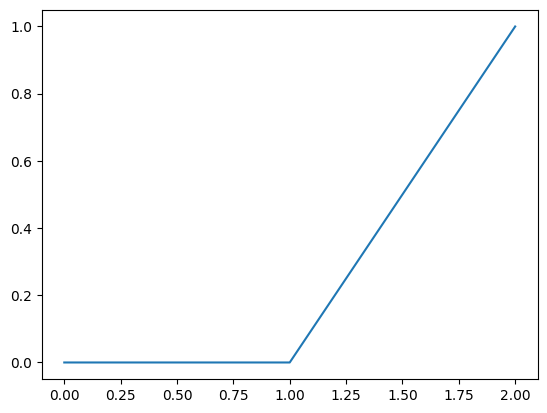

In [7]:
plt.plot(qw1.getProbVec())

In [8]:
n1 = 3

graph1 = nx.path_graph(n1)

initcond1 = [0]
t1 = np.linspace(0,eval('0.707108562377582*np.pi'))

qw1 = QWAK(graph=graph1)
qw1.runMultipleWalks(timeList = t1, initStateList = initcond1)
for qw in qw1.getProbVecList():
    print(qw)

[1.00000000e+00 0.00000000e+00 1.92592994e-32]
[9.97946438e-01 2.05250687e-03 1.05536337e-06]
[9.91806824e-01 8.17632521e-03 1.68511378e-05]
[9.81644081e-01 1.82709016e-02 8.50170267e-05]
[9.67562108e-01 3.21704825e-02 2.67409176e-04]
[9.49704328e-01 4.96468360e-02 6.48835710e-04]
[0.9282517 0.070413  0.0013353]
[0.90342019 0.09412799 0.00245182]
[0.87545783 0.12040241 0.00413976]
[0.84464124 0.14880483 0.00655393]
[0.81127189 0.17886888 0.00985923]
[0.77567195 0.2101009  0.01422715]
[0.73817996 0.24198807 0.01983196]
[0.69914627 0.2740068  0.02684693]
[0.65892835 0.30563134 0.03544032]
[0.61788614 0.3363424  0.04577146]
[0.57637732 0.36563572 0.05798696]
[0.53475278 0.39303029 0.07221693]
[0.49335219 0.4180763  0.08857151]
[0.45249985 0.44036248 0.10713767]
[0.41250079 0.45952291 0.1279763 ]
[0.37363734 0.47524295 0.15111971]
[0.33616595 0.4872645  0.17656956]
[0.30031459 0.49539014 0.20429526]
[0.26628062 0.49948647 0.23423291]
[0.23422908 0.49948622 0.2662847 ]
[0.2042917  0.4953893

In [9]:
def select_elements(list_of_lists, index):
    """
    Select elements at the specified index from a list of lists.
    
    Parameters:
        list_of_lists: A list containing inner lists.
        index: Index of the elements to be selected from each inner list.
        
    Returns:
        A list of the selected elements.
    """
    selected_elements = []
    for inner_list in list_of_lists:
        try:
            selected_elements.append(round(inner_list[index],4))
        except IndexError:
            print(f"Index {index} is out of bounds for an inner list.")
    
    return selected_elements

print(select_elements(qw1.getProbVecList(),0))

[1.0, 0.9979, 0.9918, 0.9816, 0.9676, 0.9497, 0.9283, 0.9034, 0.8755, 0.8446, 0.8113, 0.7757, 0.7382, 0.6991, 0.6589, 0.6179, 0.5764, 0.5348, 0.4934, 0.4525, 0.4125, 0.3736, 0.3362, 0.3003, 0.2663, 0.2342, 0.2043, 0.1766, 0.1511, 0.128, 0.1071, 0.0886, 0.0722, 0.058, 0.0458, 0.0354, 0.0268, 0.0198, 0.0142, 0.0099, 0.0066, 0.0041, 0.0025, 0.0013, 0.0006, 0.0003, 0.0001, 0.0, 0.0, 0.0]


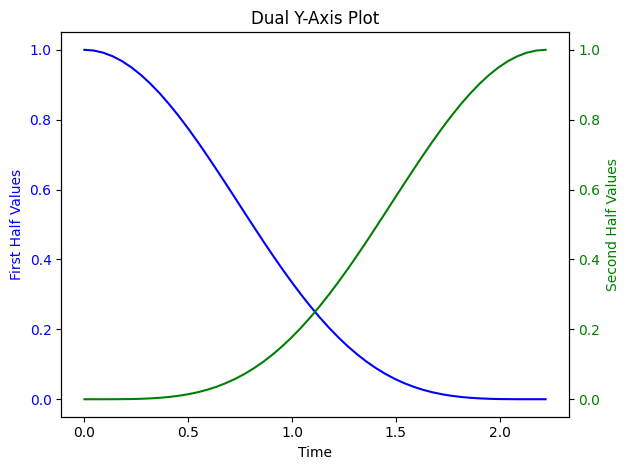

In [10]:
import matplotlib.pyplot as plt

def plot_dual_y_axis(time_list, first_half_values, second_half_values):
    """
    Plots a graph with a shared x-axis (time) and two y-axes.
    
    Parameters:
        time_list: List of time points (shared x-axis).
        first_half_values: List of values for the first y-axis.
        second_half_values: List of values for the second y-axis.
    """
    
    # Create figure and axis objects
    fig, ax1 = plt.subplots()
    
    # Plotting data on the first y-axis
    ax1.plot(time_list, first_half_values, color="blue", label="First Half Values")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("First Half Values", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    
    # Creating a second y-axis
    ax2 = ax1.twinx()
    
    # Plotting data on the second y-axis
    ax2.plot(time_list, second_half_values, color="green", label="Second Half Values")
    ax2.set_ylabel("Second Half Values", color="green")
    ax2.tick_params(axis="y", labelcolor="green")
    
    # Show the plot
    plt.title("Dual Y-Axis Plot")
    fig.tight_layout()
    plt.show()
    
time_list = t1
first_half_values = select_elements(qw1.getProbVecList(),0)
second_half_values = select_elements(qw1.getProbVecList(),2)
plot_dual_y_axis(time_list, first_half_values, second_half_values)

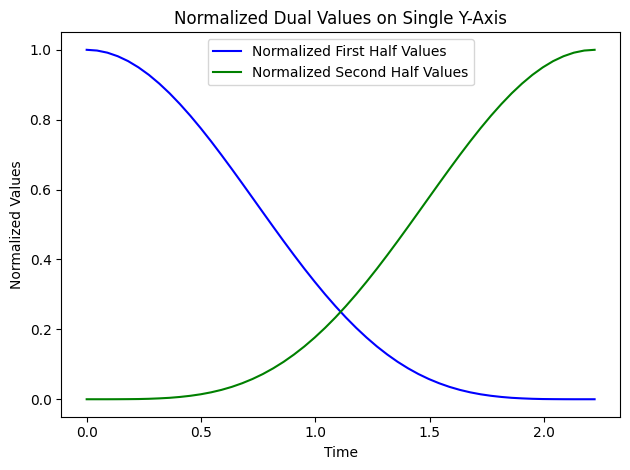

In [11]:
def plot_normalized_dual_values(time_list, first_half_values, second_half_values):
    """
    Plots a graph with a shared x-axis (time) and a single normalized y-axis.
    
    Parameters:
        time_list: List of time points (shared x-axis).
        first_half_values: List of values for the first half.
        second_half_values: List of values for the second half.
    """
    
    # Normalize the first half values
    first_min = min(first_half_values)
    first_max = max(first_half_values)
    first_normalized = [(x - first_min) / (first_max - first_min) for x in first_half_values]
    
    # Normalize the second half values
    second_min = min(second_half_values)
    second_max = max(second_half_values)
    second_normalized = [(x - second_min) / (second_max - second_min) for x in second_half_values]
    
    # Create figure and axis objects
    fig, ax = plt.subplots()
    
    # Plotting normalized data on the single y-axis
    ax.plot(time_list, first_normalized, color="blue", label="Normalized First Half Values")
    ax.plot(time_list, second_normalized, color="green", label="Normalized Second Half Values")
    ax.set_xlabel("Time")
    ax.set_ylabel("Normalized Values")
    ax.legend()
    
    # Show the plot
    plt.title("Normalized Dual Values on Single Y-Axis")
    fig.tight_layout()
    plt.show()
    
time_list = t1
first_half_values = select_elements(qw1.getProbVecList(),0)
second_half_values = select_elements(qw1.getProbVecList(),2)
plot_normalized_dual_values(time_list, first_half_values, second_half_values)

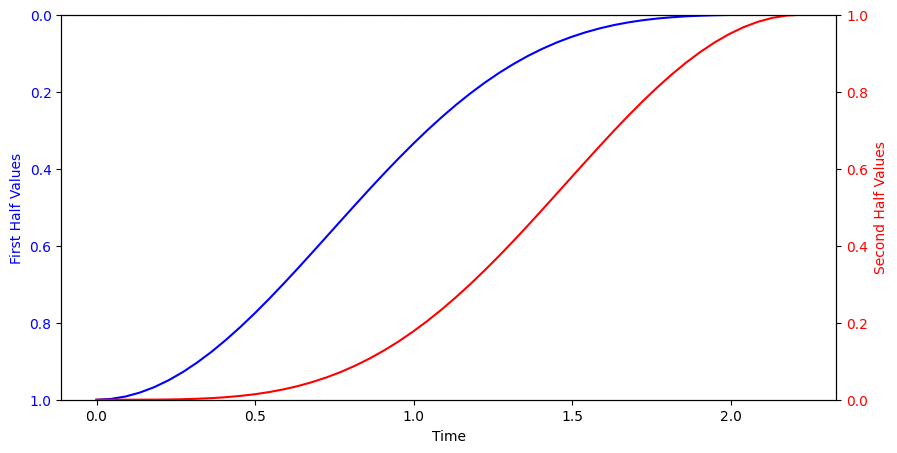

In [15]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

def plot_single_trace_with_inverted_second_half(time_list, first_half_values, second_half_values):
    # Modify the second half values
    inverted_second_half_values = [1 - value for value in second_half_values]

    # Concatenate the first half with the inverted second half
    y_values = first_half_values + inverted_second_half_values

    # Extend the time_list for plotting
    extended_time_list = time_list + [t + max(time_list) for t in time_list]

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plotting the concatenated values
    ax.plot(extended_time_list, y_values, color="blue", label="Values")
    
    # Add a horizontal line at y = 0.5
    ax.axhline(y=0.5, color='gray', linestyle='--')

    # Set the axis labels
    ax.set_xlabel("Time")
    ax.set_ylabel("Values")
    
    # Set y-axis limits
    ax.set_ylim(0, 1)

    # Show the plot
    plt.show()

    
time_list = t1
first_half_values = select_elements(qw1.getProbVecList(),0)
second_half_values = select_elements(qw1.getProbVecList(),2)
plot_split_y_axis(time_list, first_half_values, second_half_values)